In [8]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
load("environment/brain_sim_nodtu/mode=gc_bias/mapDf.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInfNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yConsNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCons.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggConsNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCor.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCorNS.RData")

### Loading the Threshold terminus tree

In [11]:
trFile <- "../brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/out_term_hirak/cluster_nwk.txt"
tr <- read.tree(trFile)
treeThr <- mergeTree(tr, se = mapDf)

In [12]:
sum(!treeThr$tip %in% rownames(yConsNS))
mOB <- mergeLeaves(tree = treeThr, ySwish = yConsNS)
treeThr <- mOB[["tree"]]
yThrNS <- mOB[["ySwish"]]
yThrNS <- computeInfRV(yThrNS, meanVariance=F)

[1] 0

[1] "Missing txps 103277"


In [13]:
yAggThrNS <- prepSwish(treeThr, yThrNS)
yAggThrNS <- computeInfRV(yAggThrNS, meanVariance=F)

In [19]:
depth <- node.depth(treeThr,2)
table(depth)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- data.frame(infRV = mcols(yAggThrNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Cons_Thr")

depth
     1      2      3      4      5      6      7      8      9     10     11 
129698   9933   3811   1691    711    332    150     62     26     15     10 
    12     13     14     15     16     17     18     19     20     21     22 
     7      5      3      2      2      1      1      1      1      1      1 

In [15]:
save(yAggThrNS, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggThrNS.RData")
save(treeThr, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeThr.RData")

### Plotting mean infRV

In [20]:
### Consensus
depth <- node.depth(treeCons,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggConsNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus"))

In [21]:
### Mean Inf
depth <- node.depth(treeMC,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggMeanInfNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="MeanInf"))

In [22]:
### Correlation
depth <- node.depth(treeCor,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggCorNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Anti-Correlation"))

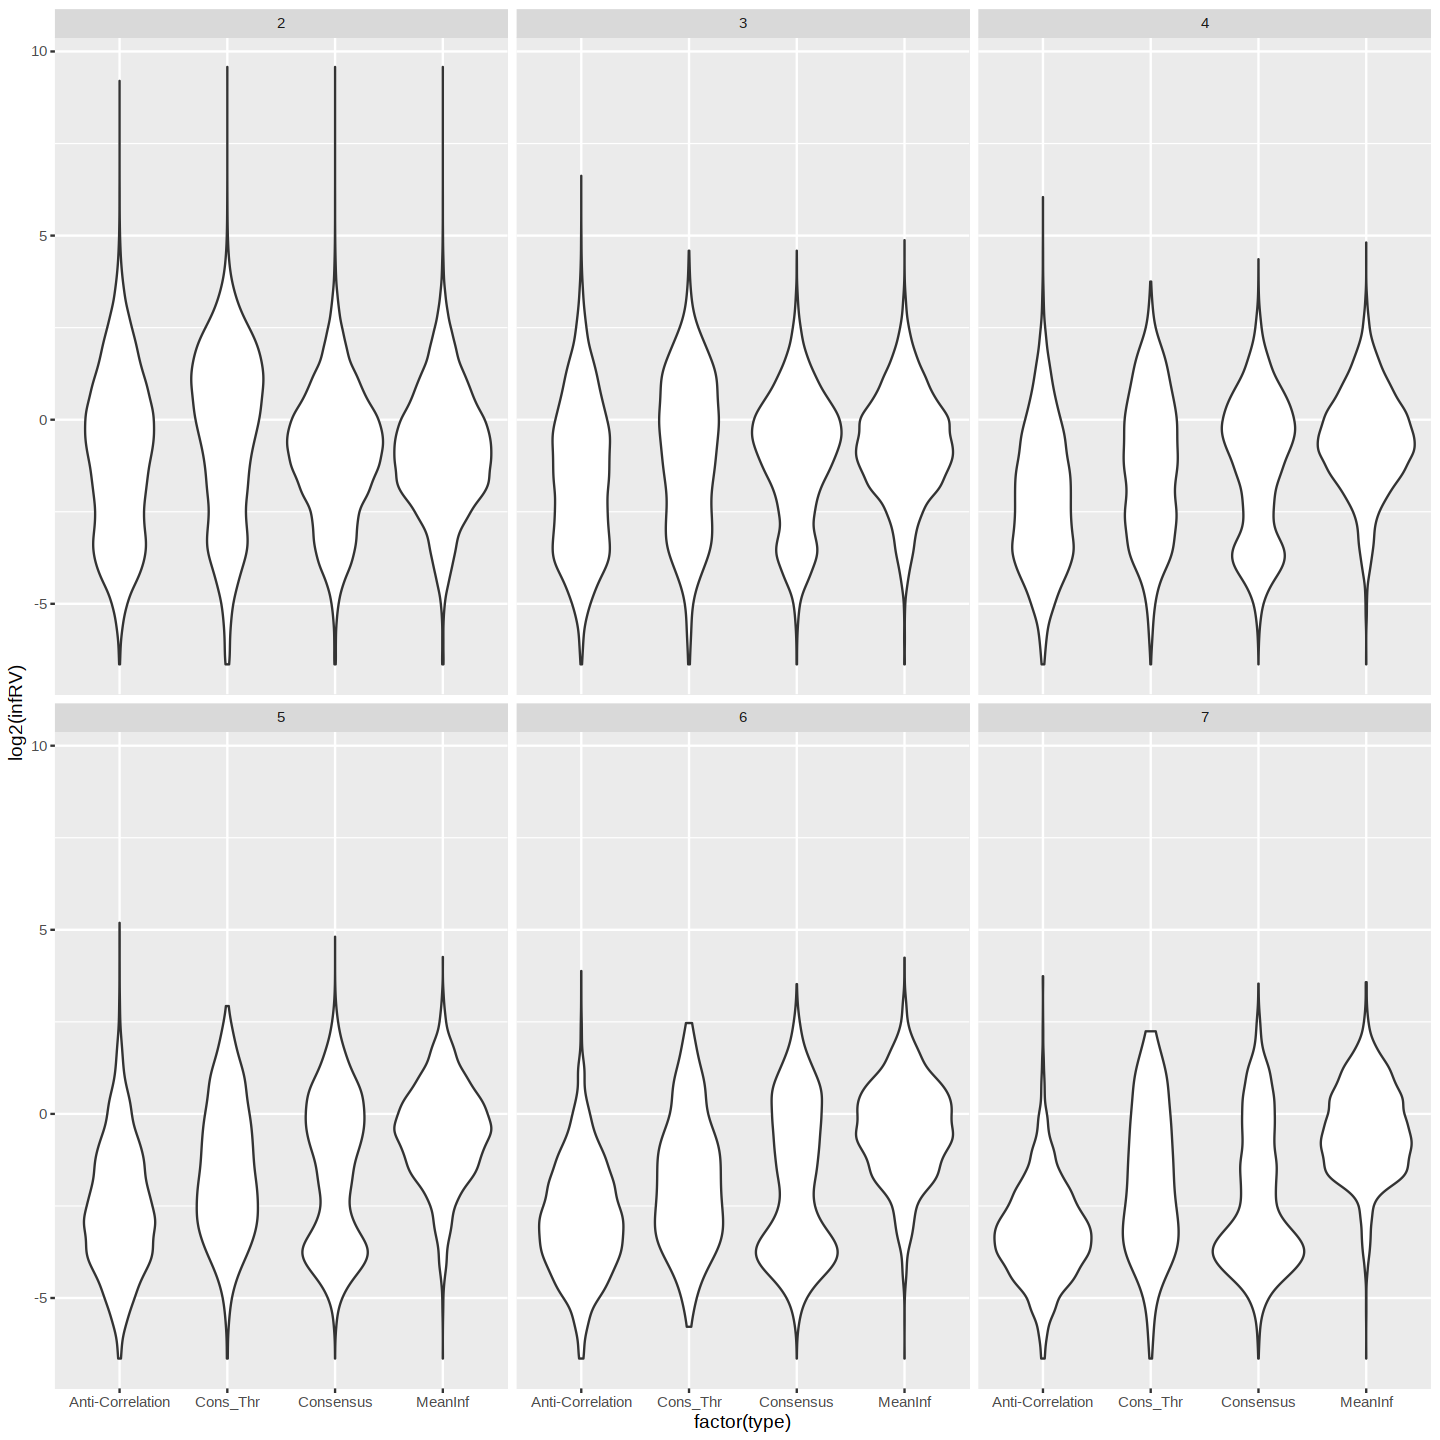

In [23]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1) %>% ggplot(aes(x=factor(type), y=log2(infRV))) + geom_violin() + facet_wrap(vars(modDep))

In [97]:
f <- function(m, p=0.2) {
    mean(m < p)
}
# dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep) %>% summarise(m = f(infRV,0.2))
reshape::cast(dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep, value="infRV", fun.aggregate = f)
reshape::cast(dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep,
              value="infRV", fun.aggregate = median)
# dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep) %>% summarise(median(infRV))

,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,0.3038168,0.3913704,0.4853254,0.58196570,0.64175258,0.75925000
2,Cons_Thr,0.2364844,0.2820782,0.3329391,0.36990155,0.42469880,0.44097222
3,Consensus,0.2253145,0.2426178,0.3169432,0.39295174,0.47100300,0.57599440
4,MeanInf,0.1774753,0.1347543,0.1037502,0.09826087,0.08546596,0.06059752


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,0.5373988,0.3285520,0.2103584,0.1521982,0.1316520,0.1034915
2,Cons_Thr,0.9682355,0.5907024,0.4206948,0.3154559,0.2607485,0.2697061
3,Consensus,0.5460351,0.5773698,0.5265047,0.4002636,0.2499506,0.1313833
4,MeanInf,0.5544565,0.6149257,0.6746561,0.7155945,0.7541963,0.6964121


In [25]:
### Consensus Thr
innNodes <- length(treeThr$tip)+1:treeThr$Nnode
childNodes <- Descendants(treeThr, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggThrNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggThrNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- data.frame(red = c(rep(1000,length(treeThr$tip)), redInfRV), type="Cons_Thr")                

In [40]:
### Consensus
innNodes <- length(treeCons$tip)+1:treeCons$Nnode
childNodes <- Descendants(treeCons, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCons$tip)), redInfRV), type="Consensus"))

In [57]:
### Correlation
innNodes <- length(treeCor$tip)+1:treeCor$Nnode
childNodes <- Descendants(treeCor, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggCorNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggCorNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCor$tip)), redInfRV), type="Anti-Correlation"))

In [4]:
### Mean Inf
innNodes <- length(treeMC$tip)+1:treeMC$Nnode
childNodes <- Descendants(treeMC, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggMeanInfNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeMC$tip)), redInfRV), type="MeanInf"))

In [9]:
i <- 1
dfRedInf[146464+221655+202059+length(treeMC$tip)+i,]
mcols(yAggMeanInfNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS)[childNodes[[i]], "meanInfRV"])

,red,type
,<dbl>,<chr>
699877,-1.142407,MeanInf


129699 
-1.142407

In [5]:
table(dfRedInf$type)


Anti-Correlation         Cons_Thr        Consensus          MeanInf 
          202059           146464           221655           181817 

In [48]:
save(dfRedInf, file = "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfRedInf.RData")

In [61]:
dfRedInf[368119+1:383876,] <- dfRedInf[c(368119+202059+1:181817,368119+1:202059),]

In [80]:
sum(dfRedInf$type != dfInfRV$type)
dfInfRV <- cbind(dfInfRV, redInfRV=dfRedInf$red)

[1] 0

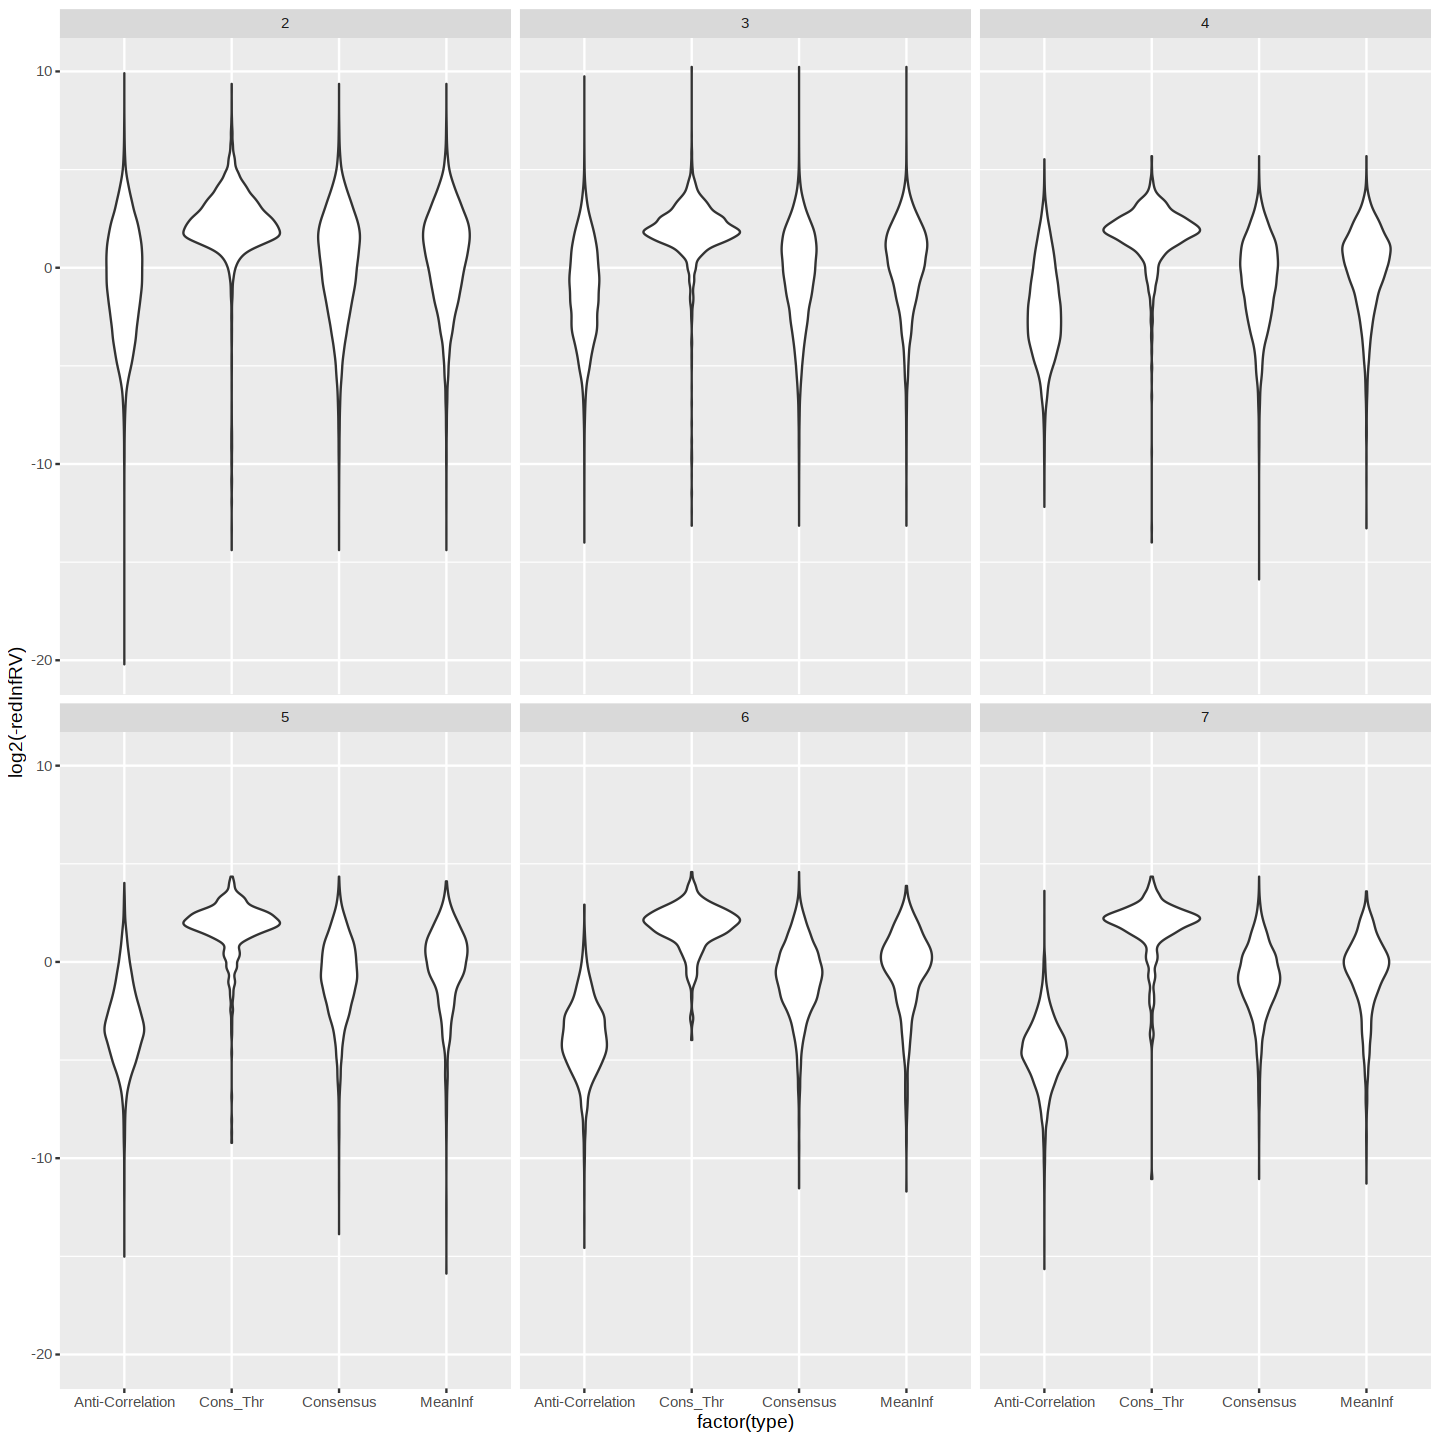

In [99]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% ggplot(aes(x=factor(type), y=log2(-redInfRV))) + geom_violin() + facet_wrap(vars(modDep))

In [111]:
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, length)
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, median, value="redInfRV")
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, min, value="redInfRV")

Using redInfRV as value column.  Use the value argument to cast to override this choice



,type,2,3,4,5,6,7
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Anti-Correlation,27089,14687,8225,4674,2621,3251
2,Cons_Thr,9143,3666,1630,683,319,271
3,Consensus,19251,11596,8137,5702,3969,6736
4,MeanInf,15993,6654,3323,1826,1029,1735


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-0.6948583,-0.462016,-0.2232195,-0.1077460,-0.07027255,-0.04249141
2,Cons_Thr,-4.6962831,-3.837638,-3.6845707,-3.9178994,-4.00215938,-4.20006755
3,Consensus,-1.3907146,-0.951204,-0.7181980,-0.6315341,-0.61309088,-0.56649852
4,MeanInf,-1.8291093,-1.374840,-1.2237072,-1.0719405,-0.96387210,-0.80472662


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-960.9102,-860.6451,-46.01828,-16.24310,-7.548011,-12.28300
2,Cons_Thr,-659.3857,-1200.2813,-51.36865,-20.32009,-23.880455,-20.31359
3,Consensus,-659.3857,-1200.2813,-51.36865,-20.32009,-23.880455,-20.31359
4,MeanInf,-659.3857,-1200.2813,-51.36865,-17.22226,-14.659407,-12.08761


### Genes

In [53]:
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/updated/comp_trees/genesCor.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/updated/comp_trees/genesL.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/genesMeanInf.RData")

In [68]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "modDep")
dfNGenes <- rbind(dfNGenes, data.frame(Type="Consensus", nGenes = sapply(genesL[2:length(genesL)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Anti-Correlation", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="MeanInf", nGenes = sapply(genesMeanInf[2:length(genesMeanInf)], length), 
                                       depth = node.depth(treeMC,2)[length(treeMC$tip)+2:treeMC$Nnode]))
dfNGenes[dfNGenes$depth > 6,"depth"]=7

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 686


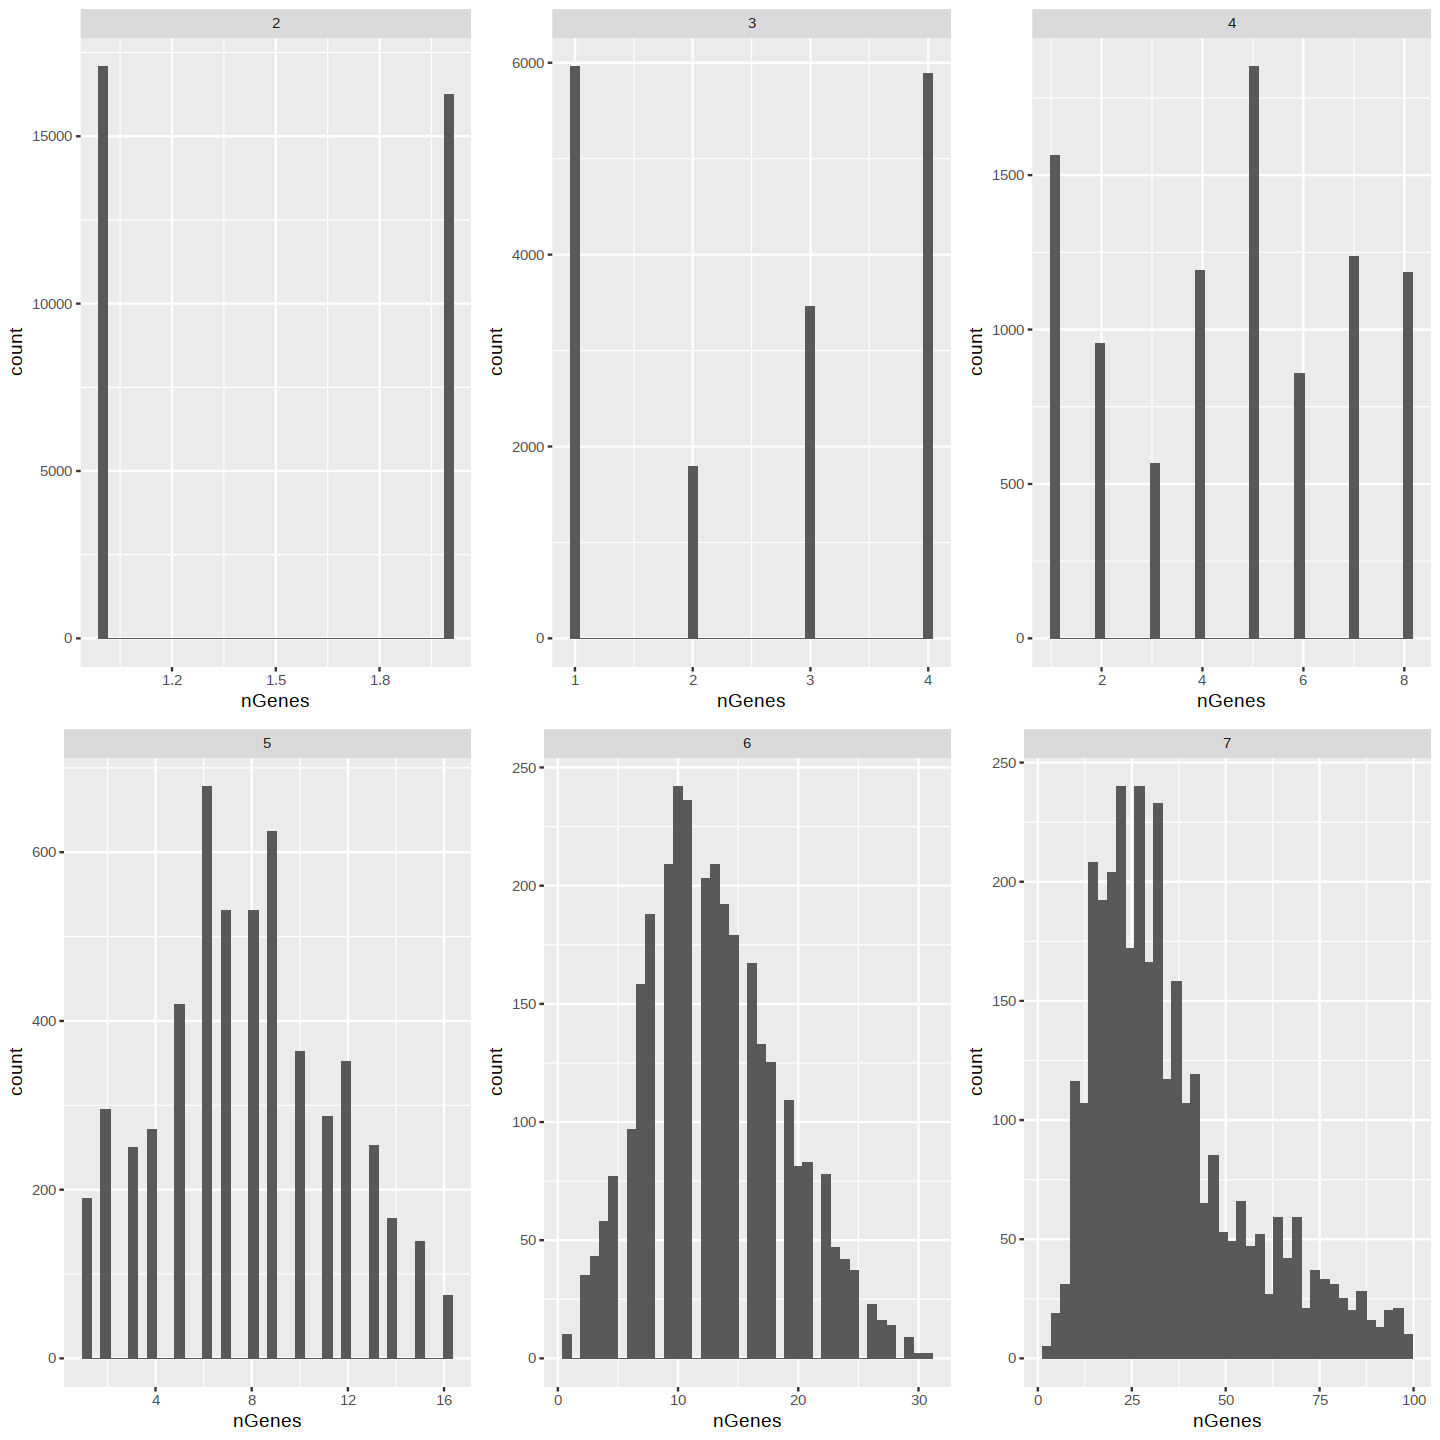

In [100]:
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


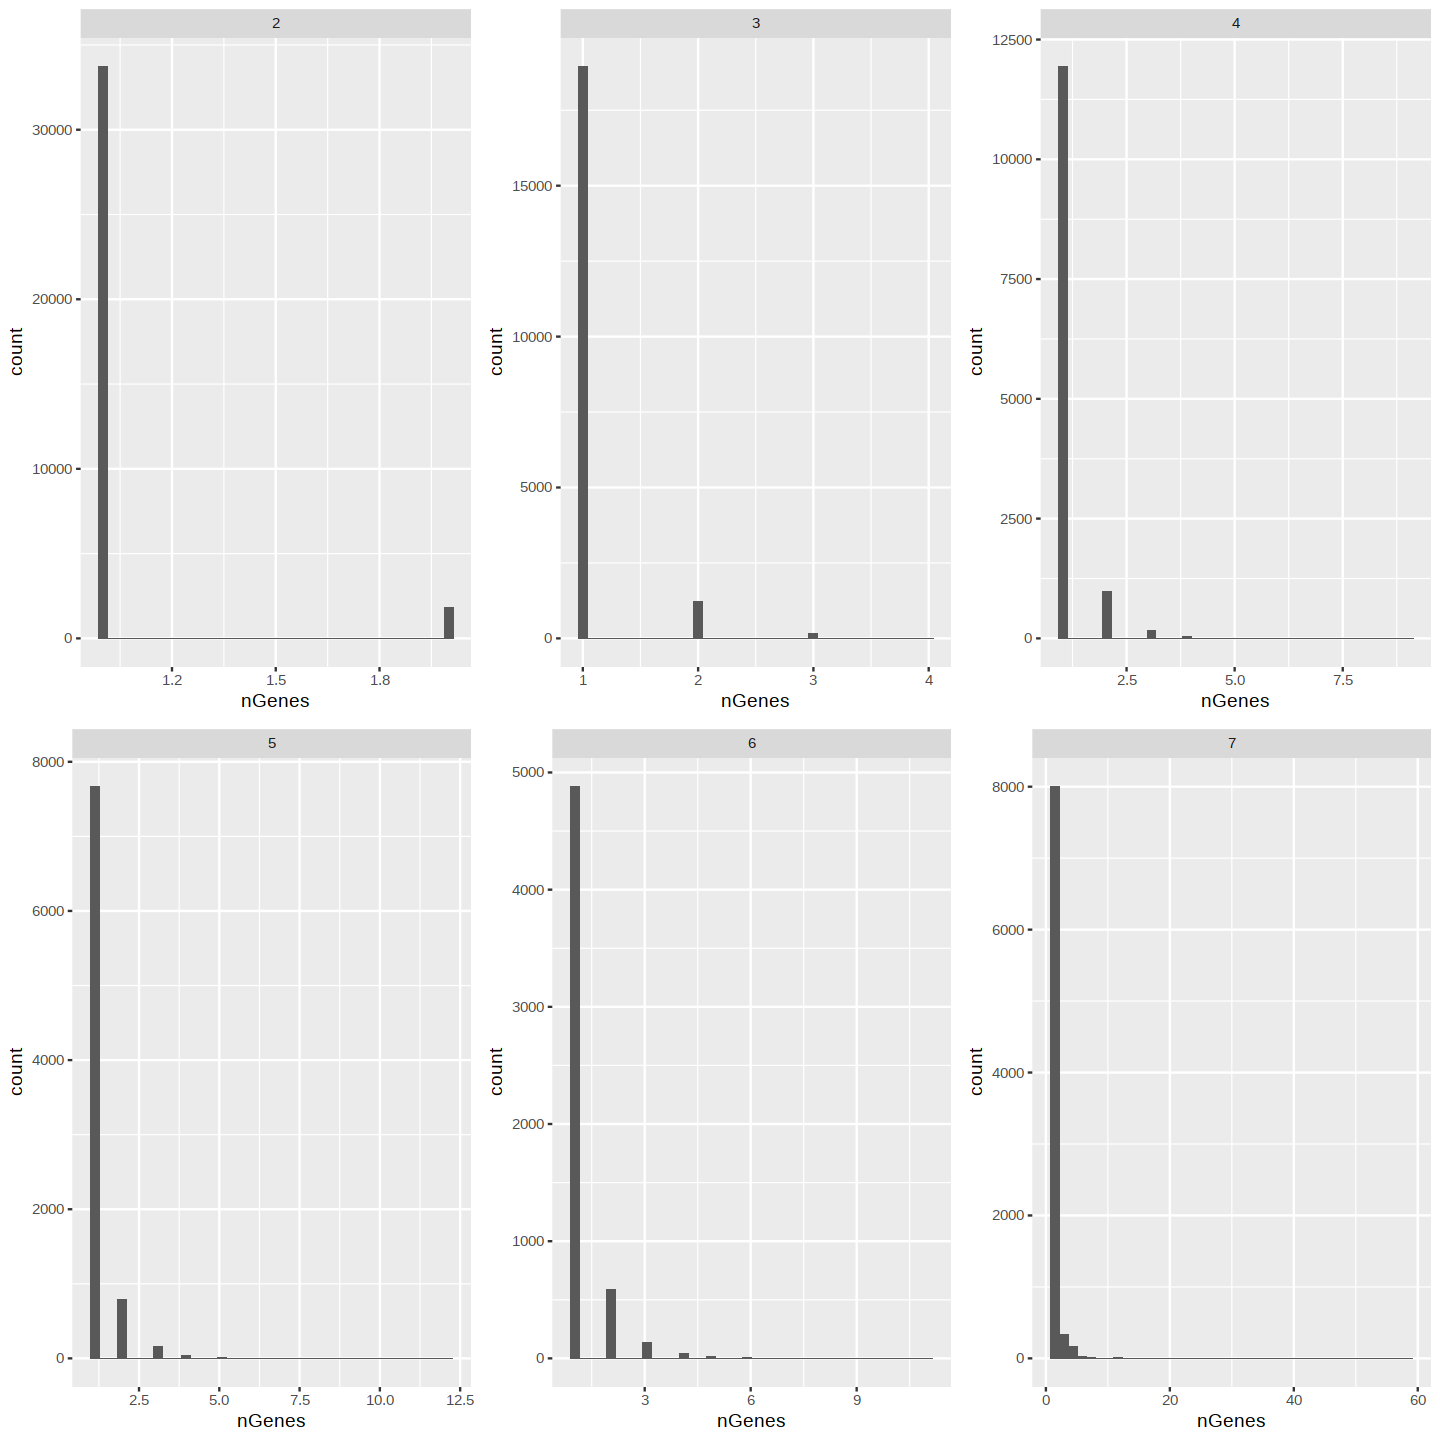

In [101]:
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


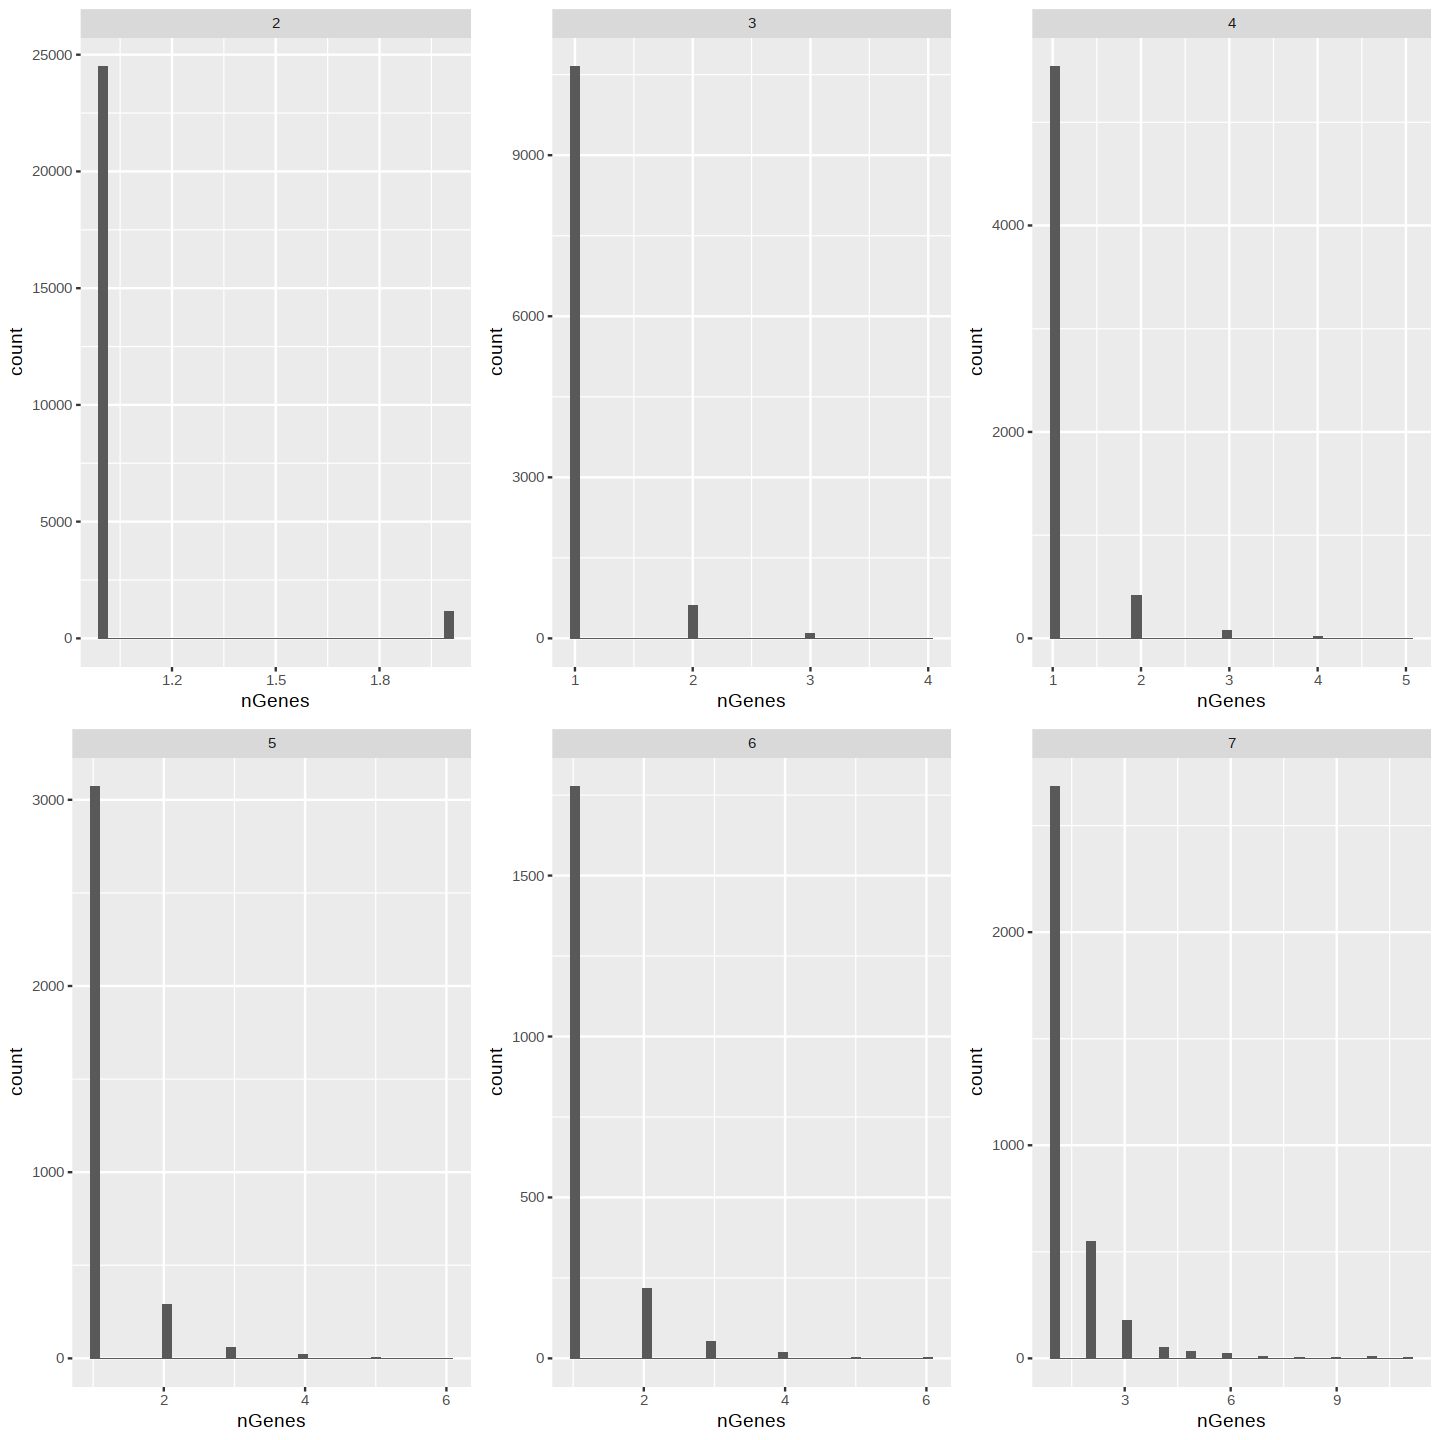

In [102]:
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "MeanInf" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "MeanInf" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)